In [1]:
import sys
sys.path.append("../../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 5
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)-combined'
MODEL_NAME = 'xlm-roberta-base'
dir = '../../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_df = train_df[train_df['class'] != 0]
val_df = val_df[val_df['class'] != 0]
test_df = test_df[test_df['class'] != 0]

english_train_texts = train_df['english_text'].values
english_val_texts = val_df['english_text'].values
english_test_texts = test_df['english_text'].values

english_train_labels = train_df[class_names].values
english_val_labels = val_df[class_names].values
english_test_labels = test_df[class_names].values

urdu_train_texts = train_df['urdu_text'].values
urdu_val_texts = val_df['urdu_text'].values
urdu_test_texts = test_df['urdu_text'].values

urdu_train_labels = train_df[class_names].values
urdu_val_labels = val_df[class_names].values
urdu_test_labels = test_df[class_names].values

sindhi_train_texts = train_df['sindhi_text'].values
sindhi_val_texts = val_df['sindhi_text'].values
sindhi_test_texts = test_df['sindhi_text'].values

sindhi_train_labels = train_df[class_names].values
sindhi_val_labels = val_df[class_names].values
sindhi_test_labels = test_df[class_names].values

english_train_texts = [hlp.preprocess_text(text, language="english") for text in english_train_texts]
english_val_texts = [hlp.preprocess_text(text, language="english") for text in english_val_texts]
english_test_texts = [hlp.preprocess_text(text, language="english") for text in english_test_texts]

urdu_train_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_train_texts]
urdu_val_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_val_texts]
urdu_test_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_test_texts]

sindhi_train_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_train_texts]
sindhi_val_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_val_texts]
sindhi_test_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_test_texts]

train_texts = np.concatenate([english_train_texts, urdu_train_texts, sindhi_train_texts])
val_texts = np.concatenate([english_val_texts, urdu_val_texts, sindhi_val_texts])
test_texts = np.concatenate([english_test_texts, urdu_test_texts, sindhi_test_texts])

train_labels = np.concatenate([english_train_labels, urdu_train_labels, sindhi_train_labels])
val_labels = np.concatenate([english_val_labels, urdu_val_labels, sindhi_val_labels])
test_labels = np.concatenate([english_test_labels, urdu_test_labels, sindhi_test_labels])

In [4]:
#shuffle data
train_texts, train_labels = hlp.shuffle_data(train_texts, train_labels)
val_texts, val_labels = hlp.shuffle_data(val_texts, val_labels)
test_texts, test_labels = hlp.shuffle_data(test_texts, test_labels)

In [5]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

ima say talk pro black girl never pushed white agenda sales lady deadass told yall dont tell perm mf child hair nigga thats supposed [0 0 0 1 0]
اِن کو اتنا بُرا خیال نہیں کِیا جاتا اُن لالچ اُن دائیں ہاتھ سب کچھ کیسے ہم جانتے نفرت بارے میں نفرت سب جھوٹ بولتے اُن لالچ وجہ سے اُن کو دھوکا دینے کوشش نہیں جاتی ۔ [0 0 0 0 1]
farhan68020698 askwhyisit interesting ان ڳالهه غور ڪندي ته گهٽ ۾ گهٽ مسلمان ملڪ واقعي نيوڪ چاهين ٿا، وٽ اڳ ۾ ئي آهي، مسلمان ماڻهن بمباري يا نه، مسلمان انتها پسندن جو ڊگهو رواج آهي ٻين کي ڪو نقصان نه پهچائڻ جو تصور اسلام کان گهڻو اڳڀرو آهي [0 0 0 0 1]
سڀ ڪچيون مري ويندا گدا مون کي هن نگا سان ڏسندا هن کي اڃا تائين ٽيڪسٽ جي جرئت ڪندا مذاق جي ڪوشش ڪندا، کي ڏکوئيندڙ بوٽن کان ٻاهر ڪڍي ڇڏيندس [0 0 0 1 0]
believe meit nothing color know antisemitism ties muslim brotherhood amp cair terrorist organizations constant trash talk america etc elected liberal idiots [0 0 0 0 1]


In [6]:
## mbert model and tokenizer
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=5 )
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:11<00:00,  4.63it/s, loss=0.141] 


Train loss 0.1555443528636608 accuracy 0.7499783268313828
Validation loss 0.11922498902387282 accuracy 0.8154866393602497
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.8154866393602497
Epoch 1/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:12<00:00,  4.62it/s, loss=0.107] 


Train loss 0.11271925200030063 accuracy 0.8284351972258344
Validation loss 0.11137069877151888 accuracy 0.8345686236265523
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.8345686236265523
Epoch 2/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:13<00:00,  4.60it/s, loss=0.108] 


Train loss 0.10229885336605835 accuracy 0.851506285218899
Validation loss 0.11488093709158798 accuracy 0.8453936675118653
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.8453936675118653
Epoch 3/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:12<00:00,  4.61it/s, loss=0.0931]


Train loss 0.09314066867102531 accuracy 0.8683246640658865
Validation loss 0.11678977750567042 accuracy 0.8549834211039594
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.8549834211039594
Epoch 4/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:12<00:00,  4.61it/s, loss=0.0548]


Train loss 0.08314307983874263 accuracy 0.8886757693974859
Validation loss 0.12317530096754463 accuracy 0.8602171510304921
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.8602171510304921
Epoch 5/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:12<00:00,  4.61it/s, loss=0.0587]


Train loss 0.07411300834015157 accuracy 0.903912006935414
Validation loss 0.13344345322719112 accuracy 0.8602171510304921
No improvement in validation accuracy for 1 epochs.
Epoch 6/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:10<00:00,  4.65it/s, loss=0.0342] 


Train loss 0.0651066805834749 accuracy 0.9178695275249241
Validation loss 0.13660535820819855 accuracy 0.8583967232299591
No improvement in validation accuracy for 2 epochs.
Epoch 7/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:11<00:00,  4.63it/s, loss=0.0296] 


Train loss 0.05686318042788825 accuracy 0.9306241872561769
Validation loss 0.15492977864900895 accuracy 0.860899811455692
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.860899811455692
Epoch 8/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:12<00:00,  4.62it/s, loss=0.0519] 


Train loss 0.04942641646282207 accuracy 0.9411573472041612
Validation loss 0.16735774311943757 accuracy 0.8594694753267018
No improvement in validation accuracy for 1 epochs.
Epoch 9/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:11<00:00,  4.63it/s, loss=0.0382] 


Train loss 0.042255392927164924 accuracy 0.9503901170351106
Validation loss 0.18356226432658035 accuracy 0.8562512190364736
No improvement in validation accuracy for 2 epochs.
Epoch 10/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:10<00:00,  4.64it/s, loss=0.0153] 


Train loss 0.03889985387255509 accuracy 0.9547355873428696
Validation loss 0.19273960885442715 accuracy 0.8544958065145309
No improvement in validation accuracy for 3 epochs.
Epoch 11/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:11<00:00,  4.62it/s, loss=0.0247] 


Train loss 0.033270524355360716 accuracy 0.962397052449068
Validation loss 0.20894558674301525 accuracy 0.8527403939925883
No improvement in validation accuracy for 4 epochs.
Epoch 12/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:11<00:00,  4.64it/s, loss=0.0303] 


Train loss 0.0296280277900536 accuracy 0.967002600780234
Validation loss 0.2156285818921801 accuracy 0.8528054092711788
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


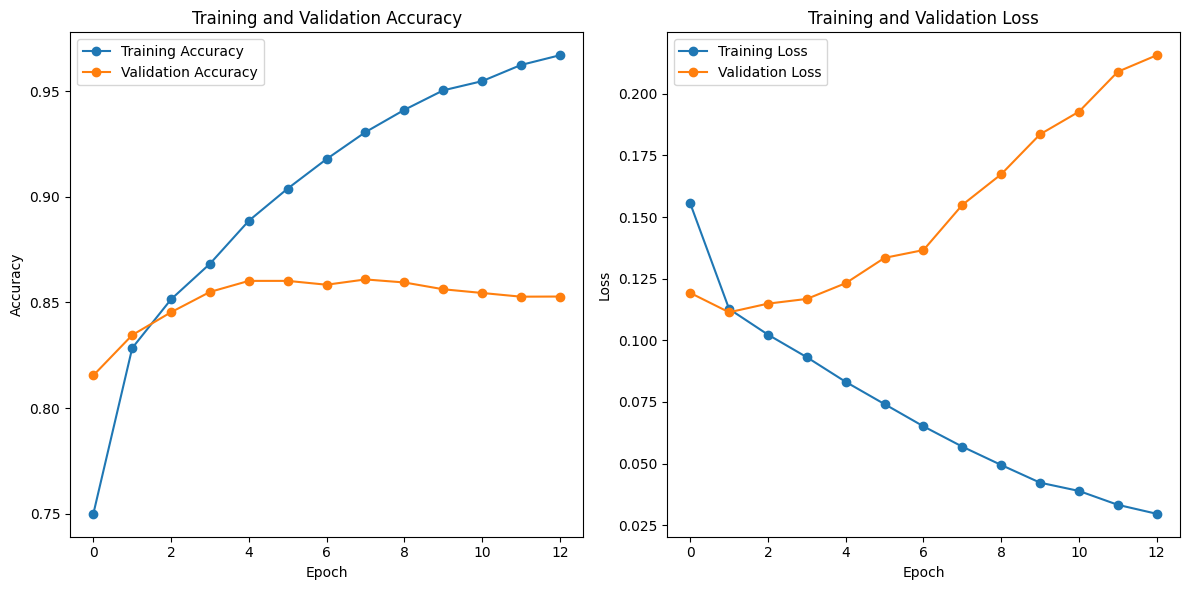

In [8]:
hlp.plot_history(history)

In [9]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc:.2f} Test Loss: {test_loss}')

Test Accuracy: 0.85 Test Loss: 0.21660128544063428


Accuracy: 0.85
F1 Score: 0.85
Precision: 0.86
Recall: 0.85

Classification Report:
                    precision    recall  f1-score   support

        Disability       0.45      0.20      0.28       455
     Gender/Sexual       0.92      0.77      0.84     12304
Origin/Nationality       0.48      0.66      0.55       290
    Race/Ethnicity       0.78      0.90      0.83      8962
          Religion       0.89      0.96      0.92      8751

          accuracy                           0.85     30762
         macro avg       0.70      0.70      0.69     30762
      weighted avg       0.86      0.85      0.85     30762



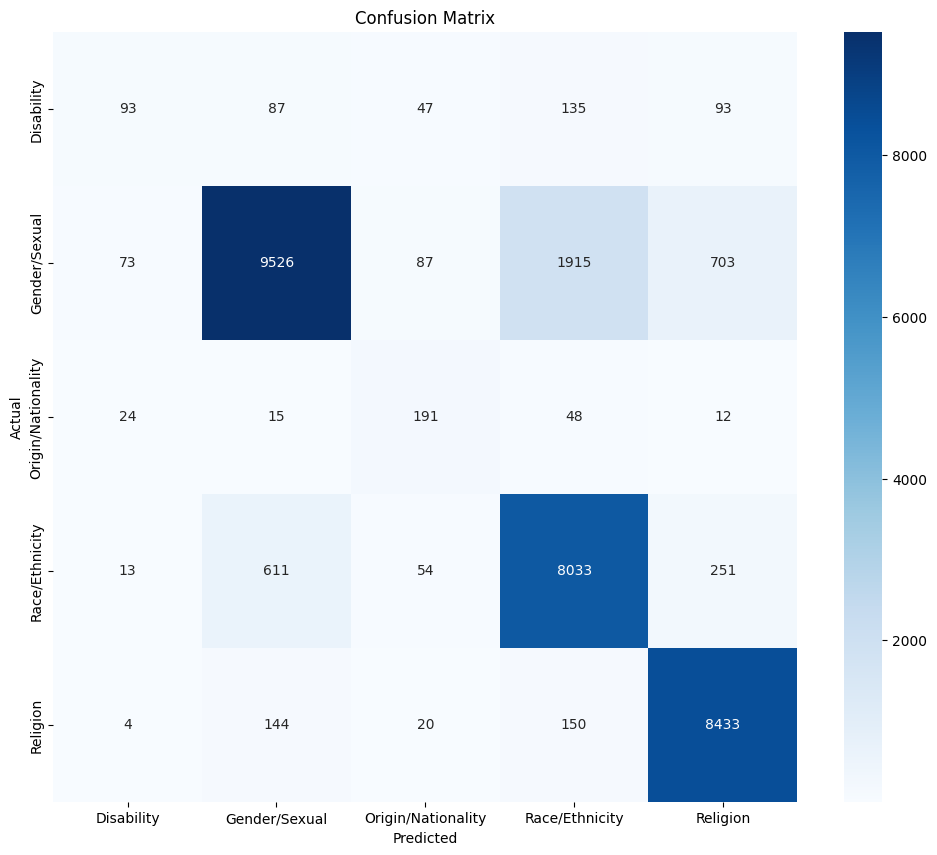

In [10]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)

In [11]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Origin/Nationality with confidence: 1.00


In [12]:
test_texts = ["Muslims are pathetic they are not humans fuck"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Religion with confidence: 1.00
